<div class="container" style="display:flex; width:100%;height:150px;background-color:None;">
    <div class="subcontainer-1" style="flex:0.11;height:100%;width:20%;">
        <div class="logo-frame" style="height:100%;background-color:None;">
            <img src="assets/skill_academy_logo.jpg" style="height:100%;float:left; filter:invert(0%);">
        </div>
    </div>
    <div class="subcontainer-2" style="flex:0.89;height:60%;margin-top:2.5%">
        <div class="upper-sidebar" style="height:50%;width:100%;background-color:None;align-items:center;display:inline-flex;">
            <div style="font-size:50px; font-family:Trebuchet MS; font-weight:bold; text-align:left">
            Skill Academy Project
            </div>
        </div>
        <div class="lower-sidebar" style="height:50%;width:100%;background-color:None;align-items:center;display: inline-flex;">
            <div style="font-size:30px; font-family:Trebuchet MS;">
            &mdash; Final Project : Stock Price Forecasting
            </div>
        </div>
    </div>
</div>

<hr style="width:95%;height:2px;background-color:black;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:45px; text-align:left; line-height:50px">
Building LSTM Neural Networks-Based Sequential Model for UNTR Stock Price Prediction
</div>

&mdash; Membangun model yang dapat melakukan *forecasting* harga tertinggi dan terendah saham UNTR untuk 5 hari ke depan selama hari aktif bursa efek.

**Table of contents**<a id='toc0_'></a>    
- [**A. Pendahuluan**](#toc1_)    
  - [1) Deskripsi Proyek](#toc1_1_)    
  - [2) Tujuan dan Alur Proses](#toc1_2_)    
- [**B. Memuat Data**](#toc2_)    
- [**C. Ikhtisar Data**](#toc3_)    
- [**D. Mempersiapkan Data**](#toc4_)    
  - [1) Eksplorasi Data](#toc4_1_)    
  - [2) Perbaikan Data](#toc4_2_)    
  - [3) Pengayaan Data](#toc4_3_)    
  - [4) Reduksi Data](#toc4_4_)    
- [**E. Analisa Data Eksploratif (EDA)**](#toc5_)    
  - [1) Bagaimana tren harga saham UNTR](#toc5_1_)    
  - [2) Bagaimana tingkat volatilitas saham UNTR](#toc5_2_)    
  - [3) Bagaimana Korelasi Harga Masa Lalu Terhadap Harga Saham saat ini?](#toc5_3_)    
- [**F. Membangun Model *Machine-learning***](#toc6_)    
  - [1) *Features Engineering*](#toc6_1_)    
  - [2) Membangun Model](#toc6_2_)    
  - [3) Melatih Model](#toc6_3_)    
  - [4) *Model Testing*](#toc6_4_)    
- [**G. Kesimpulan**](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[**A. Pendahuluan**](#toc0_)

## <a id='toc1_1_'></a>[1) Deskripsi Proyek](#toc0_)

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:25px; padding-bottom:20px">Memprediksi harga saham UNTR untuk keperluan <i>swing trading</i></div>

<div style="margin-left:2%; width:95%; text-align:justify">

*Swing trading* merupakan salah satu strategi jual-beli di bursa saham, dimana seorang *trader* akan menahan saham yang sudah dibeli selama satu hari atau lebih dalam upaya mendapatkan keuntungan dari perubahan harga. Seorang *swing trader* akan  lebih lama berada pada posisi *swing  trading* dibandingkan posisi *day trading* tetapi akan lebih pendek  dibandingkan strategi *investing*.

Saham UNTR (United Tractor) merupakan saham yang sering digunakan oleh *swing trader* dalam melakukan aktivitas jual-beli. Kondisi fundamental perusahaan yang baik serta likuiditas yang tinggi akan membuat resiko kerugian lebih kecil. Volatilitas harian hingga 4% menjadi peluang yang dapat dimaksimalkan oleh *trader*.

Oleh karena itu, untuk membantu *swing trader* dalam membuat keputusan *trading* maka diperlukan suatu *tools* yang dapat memberikan proyeksi harga tertinggi dan terendah saham UNTR untuk 5 hari ke depan (1 minggu hari aktif bursa).
</div>

## <a id='toc1_2_'></a>[2) Tujuan dan Alur Proses](#toc0_)

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">TUJUAN</div>
<div style="margin-left:2%; width:95%; text-align:justify">

Tujuan yang ingin dicapai pada proyek ini adalah dapat menghasilkan model yang mampu memprediksi harga saham untuk komponen harga tertinggi dan harga terendah secara akurat. Penilaian kualitas model akan mengacu pada hasil skor MAPE (*Mean Absolute Percentage Error*) ketika model memprediksi *testing dataset*.
</div>

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">ALUR PROYEK</div>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar Data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter data serta sejumlah catatan dokumentasi terkait dataset.</div>        
2. **Mempersiapkan Data.** <div> Pada bagian ini, data yang telah diimpor akan dilakukan proses eksplorasi untuk melihat berbagai permasalahan pada data kemudian dilanjutkan dengan perbaikan data. Apabila diperlukan, reduksi dan pengayaan data akan dilakukan untuk membuang informasi yang tidak relevan dan memperkaya informasi pada dataset. Hasil akhir dari proses ini yaitu dataset yang siap untuk dilakukan proses analisis.</div>        
3. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan dilakukan sejumlah perhitungan statistik deskriptif dan menampilkan sejumlah visualisasi data untuk melihat pola-pola tertentu.</div>
4. **Membangun Model *Machine-learning*.** <div> Pada tahap ini akan dilakukan sejumlah *feature engineering*, persiapan arsitektur model, pelatihan model dan evaluasi model. </div>

</div>

# <a id='toc2_'></a>[**B. Memuat Data**](#toc0_)

* Memuat sejumlah *library* dan data yang dibutuhkan.

In [58]:
# library for data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

# library for data visualization
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# library for building models
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


# other
import joblib

In [2]:
# memuat dataset
try:
    raw_df = pd.read_csv("datasets/UNTR.csv", parse_dates=['Date'], index_col='Date')
    
except:
    raw_df = pd.read_csv("/datasets/UNTR.csv", parse_dates=['Date'], index_col='Date')

# <a id='toc3_'></a>[**C. Ikhtisar Data**](#toc0_)

Berikut di bawah ini ditampilkan 10 baris data pada dataset yang akan dianalisis.

In [3]:
# display observations
print(f"Ukuran dataset                           : {raw_df.shape}")
print(f"Apakah DatetimeIndex dalam urutan naik?  : {raw_df.index.is_monotonic_increasing}")
print(f"Interval pengambilan data  per observasi : {raw_df.index.diff().dropna().unique().to_list()}")
print(f"Periode pengamatan                       : {raw_df.index.min()} s/d {raw_df.index.max()}\n")
print(raw_df.head(5), '\n')
print(raw_df.tail(5))

Ukuran dataset                           : (4700, 6)
Apakah DatetimeIndex dalam urutan naik?  : True
Interval pengambilan data  per observasi : [Timedelta('1 days 00:00:00'), Timedelta('3 days 00:00:00'), Timedelta('4 days 00:00:00'), Timedelta('2 days 00:00:00'), Timedelta('6 days 00:00:00'), Timedelta('5 days 00:00:00'), Timedelta('7 days 00:00:00'), Timedelta('10 days 00:00:00'), Timedelta('8 days 00:00:00'), Timedelta('11 days 00:00:00')]
Periode pengamatan                       : 2005-01-03 00:00:00 s/d 2023-12-29 00:00:00

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2005-01-03  2092.781494  2161.774414  2069.783936  2138.776855   934.942627   
2005-01-04  2161.774414  2345.755127  2161.774414  2345.755127  1025.420898   
2005-01-05  2368.752686  2368.752686  2253.764648  2253.764648   985.208313   
2005-01-06  2253.764648  2345.755127  2253.764648  2322.757568  1015.3

Data di atas merupakan informasi historis harga saham UNTR pada periode 03 Januari 2005 hingga  29 Desember 2023. Data saat ini telah tersusun dalam urutan naik (berdasarkan *DatetimeIndex*) dan memiliki sebanyak 4700 observasi. Pada **Interval pengambilan data  per observasi**, terlihat bahwa interval tidak hanya 1 hari tetapi ada yang 2 hari, 3 hari, hingga 11 hari. Fenomena tersebut berkaitan dengan hari libur Bursa Efek Indonesia (BEI), sehingga data pada hari-hari tersebut tidak terekam oleh sistem.

Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

* `Open`  — Harga pembukaan saham pada hari tertentu.
* `High`  — Harga tertinggi saham pada hari tertentu.
* `Low`  — Harga terendah saham pada hari tertentu.
* `Close`  — Harga penutupan saham pada hari tertentu (telah disesuaikan dengan *stock splits*).
* `Adj Close`  — Harga penutupan saham pada hari tertentu (telah disesuaikan dengan *stock splits* dan *dividend*).
* `Volume` — Jumlah lembar saham yang  ditransaksikan pada  hari tertentu.


# <a id='toc4_'></a>[**D. Mempersiapkan Data**](#toc0_)

## <a id='toc4_1_'></a>[1) Eksplorasi Data](#toc0_)

Berikut di bawah ini merupakan informasi umum dataset.

In [4]:
# general information of the dataset
print(f"Apakah DatetimeIndex dalam urutan naik?  : {raw_df.index.is_monotonic_increasing}")
print(f"Interval pengambilan data  per observasi : {raw_df.index.diff().dropna().unique().to_list()}\n")
raw_df.info()

Apakah DatetimeIndex dalam urutan naik?  : True
Interval pengambilan data  per observasi : [Timedelta('1 days 00:00:00'), Timedelta('3 days 00:00:00'), Timedelta('4 days 00:00:00'), Timedelta('2 days 00:00:00'), Timedelta('6 days 00:00:00'), Timedelta('5 days 00:00:00'), Timedelta('7 days 00:00:00'), Timedelta('10 days 00:00:00'), Timedelta('8 days 00:00:00'), Timedelta('11 days 00:00:00')]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4700 entries, 2005-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4699 non-null   float64
 1   High       4699 non-null   float64
 2   Low        4699 non-null   float64
 3   Close      4699 non-null   float64
 4   Adj Close  4699 non-null   float64
 5   Volume     4699 non-null   float64
dtypes: float64(6)
memory usage: 257.0 KB


In [5]:
# baris dengan missing value
raw_df[raw_df.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN


Dari hasil di atas, berikut informasi yang diperoleh.
* Dataset mengandung 1 baris dengan *missing value*, yaitu pada hari Rabu, 19 Juni 2019.
* Tidak terdapat kesalahan penggunaan tipe data.
* Tidak terdapat duplikat pada dataset karena telah menggunakan *DatetimeIndex*.
* Frekuensi pengamatan setiap observasi (Interval pengambilan data  per observasi) tidak bersifat unik. Terdapat interval 1 hari, 3 hari hingga 11 hari dikarenakan hari libur bursa. Akan tetapi hal ini tidak menjadi masalah dan dapat diabaikan.

## <a id='toc4_2_'></a>[2) Perbaikan Data](#toc0_)

Data saat ini memiliki masalah terkait *missing value* pada satu baris, yaitu pada data hari Rabu, 19 Juni 2019. Untuk menangani masalah tersebut, maka data akan diisi dengan metode interpolasi.

In [6]:
def missingvalue_handling(data:pd.DataFrame):
    df = data.copy()
    df = df.interpolate()
    return df

In [7]:
new_df = missingvalue_handling(raw_df)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4700 entries, 2005-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4700 non-null   float64
 1   High       4700 non-null   float64
 2   Low        4700 non-null   float64
 3   Close      4700 non-null   float64
 4   Adj Close  4700 non-null   float64
 5   Volume     4700 non-null   float64
dtypes: float64(6)
memory usage: 257.0 KB


## <a id='toc4_3_'></a>[3) Pengayaan Data](#toc0_)

Dataset yang kita miliki saat ini hanya memiliki informasi terkait harga dan volume transaksi saham. Oleh karena itu perlu dilakukan penambahan fitur agar informasi yang akan dimuat ke dalam model *machine learning* menjadi lebih kemprehensif. Berikut adalah fitur-fitur yang akan ditambahkan:
1. **MA20** : Fitur yang menunjukkan nilai rata-rata harga penutupan selama 20 hari terakhir.
2. **Breakout MA20** : Fitur yang menunjukkan apakah harga penutupan menembus nilai MA20 atau tidak.
3. **Fitur *lag***.

Selain fitur, kita juga perlu menambahkan data target untuk `t+1` hingga `t+4` karena kita akan menggunakan 5 *timestep* sebagai output *forecasting*, yakni data `t`, `t+1`, `t+2`, `t+3` dan `t+4`.

In [8]:
def make_targets(data:pd.DataFrame):
    df = data.copy()
    for i in range(1,5):
        df[f"High(t+{i})"] = df['High'].shift(-i)
        df[f"Low(t+{i})"] = df['Low'].shift(-i)
    
    return df.dropna()

In [9]:
def make_features(data:pd.DataFrame, lag:list[int]=None):
    df = data.copy()
    
    # rolling window features
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['breakout_MA20'] = (df['Close'] > df['MA20']).apply(lambda x: 1 if x else 0)
    
    # lag features
    if lag: # will be executed if the variable has a value
        for i in sorted(lag, reverse=True):
            df[f"Open(t-{i})"] = df['Open'].shift(i)
            df[f"High(t-{i})"] = df['High'].shift(i)
            df[f"Low(t-{i})"] = df['Low'].shift(i)
            df[f"Close(t-{i})"] = df['Close'].shift(i)
            df[f"MA20(t-{i})"] = df['MA20'].shift(i)
            df[f"breakout_MA20(t-{i})"] = df['breakout_MA20'].shift(i)
    
    return df.dropna()

In [10]:
# menambahkan fitur dan target
new_df = make_targets(new_df)
new_df = make_features(new_df, list(range(1,4)))

print(new_df.columns)
print("Size:", new_df.shape)
new_df.head()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'High(t+1)',
       'Low(t+1)', 'High(t+2)', 'Low(t+2)', 'High(t+3)', 'Low(t+3)',
       'High(t+4)', 'Low(t+4)', 'MA20', 'breakout_MA20', 'Open(t-3)',
       'High(t-3)', 'Low(t-3)', 'Close(t-3)', 'MA20(t-3)',
       'breakout_MA20(t-3)', 'Open(t-2)', 'High(t-2)', 'Low(t-2)',
       'Close(t-2)', 'MA20(t-2)', 'breakout_MA20(t-2)', 'Open(t-1)',
       'High(t-1)', 'Low(t-1)', 'Close(t-1)', 'MA20(t-1)',
       'breakout_MA20(t-1)'],
      dtype='object')
Size: (4674, 34)


,Open,High,Low,Close,Adj Close,Volume,High(t+1),Low(t+1),High(t+2),Low(t+2),...,Low(t-2),Close(t-2),MA20(t-2),breakout_MA20(t-2),Open(t-1),High(t-1),Low(t-1),Close(t-1),MA20(t-1),breakout_MA20(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-03,2713.716797,2713.716797,2598.728760,2598.728760,1136.005493,13582939.0,2736.714355,2621.726318,2736.714355,2713.716797,...,2621.726318,2713.716797,2374.502161,1.0,2713.716797,2782.709473,2667.721436,2667.721436,2390.600476,1.0
2005-02-04,2621.726318,2736.714355,2621.726318,2713.716797,1186.271606,10058658.0,2736.714355,2713.716797,2713.716797,2621.726318,...,2667.721436,2667.721436,2390.600476,1.0,2713.716797,2713.716797,2598.728760,2598.728760,2407.848682,1.0
2005-02-07,2713.716797,2736.714355,2713.716797,2713.716797,1186.271606,4110211.0,2713.716797,2621.726318,2644.723877,2598.728760,...,2598.728760,2598.728760,2407.848682,1.0,2621.726318,2736.714355,2621.726318,2713.716797,2427.396643,1.0
2005-02-08,2713.716797,2713.716797,2621.726318,2644.723877,1156.112305,3002487.0,2644.723877,2598.728760,2713.716797,2644.723877,...,2621.726318,2713.716797,2427.396643,1.0,2713.716797,2736.714355,2713.716797,2713.716797,2448.094482,1.0
2005-02-11,2644.723877,2644.723877,2598.728760,2621.726318,1146.058716,6872999.0,2713.716797,2644.723877,2805.707031,2713.716797,...,2713.716797,2713.716797,2448.094482,1.0,2713.716797,2713.716797,2621.726318,2644.723877,2466.492554,1.0


## <a id='toc4_4_'></a>[4) Reduksi Data](#toc0_)

Pada proyek ini, fitur yang akan digunakan adalah fitur harga saham masa lalu, MA20 dan Breakout MA20 masa lalu. Adapun target yang akan diprediksi adalah harga saham tertinggi dan terendah hari ini (t) hingga 4 hari ke depan (t+4). Oleh karena itu, kolom-kolom yang tidak diperlukan akan dikeluarkan dari dataframe. 

In [11]:
def remove_unimportant_columns(data:pd.DataFrame):
    
    return data.drop(columns=["Volume", "Adj Close", "Open", "Close", "MA20", "breakout_MA20"])

new_df = remove_unimportant_columns(new_df)

print(new_df.columns)    

Index(['High', 'Low', 'High(t+1)', 'Low(t+1)', 'High(t+2)', 'Low(t+2)',
       'High(t+3)', 'Low(t+3)', 'High(t+4)', 'Low(t+4)', 'Open(t-3)',
       'High(t-3)', 'Low(t-3)', 'Close(t-3)', 'MA20(t-3)',
       'breakout_MA20(t-3)', 'Open(t-2)', 'High(t-2)', 'Low(t-2)',
       'Close(t-2)', 'MA20(t-2)', 'breakout_MA20(t-2)', 'Open(t-1)',
       'High(t-1)', 'Low(t-1)', 'Close(t-1)', 'MA20(t-1)',
       'breakout_MA20(t-1)'],
      dtype='object')


# <a id='toc5_'></a>[**E. Analisa Data Eksploratif (EDA)**](#toc0_)

> *Function* untuk visualisasi distribusi data menggunakan boxplot dan histogram

In [47]:
def box_hist_plot(df:pd.DataFrame, column:str, size:tuple, width:int, title:str, y_title, xlabel:str, 
                  rot:int=None, l_ylim=None, r_ylim=None, l_xlim=None, r_xlim=None, discrete=False, kde=True):
    
    fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=size)
    sns.boxplot(ax=ax1[0],data=df, x=column, color='#2A9D8F',
                showmeans=True, meanprops={"marker":"d","markerfacecolor":"white",
                                                    "markeredgecolor":"black","markersize":"6"})
    sns.histplot(ax=ax1[1], data=df, x=column, binwidth=width, kde=kde, color='#2A9D8F', discrete=discrete)
    fig.suptitle(title, size=15, y=y_title)

    # value boxplot
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)
    minimum = df[column].min()
    maximum = df[column].max()
    iqr = q3-q1
    
    if q3+1.5*iqr<=maximum:
        top_whis = q3+1.5*iqr
    else:
        top_whis = maximum
    
    if q1-1.5*iqr>=minimum:
        bottom_whis = q1-1.5*iqr
    else:
        bottom_whis = minimum
    y_position = -0.45

    ax1[0].text(q1, y_position, np.round(q1, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q2, y_position, np.round(q2, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q3, y_position, np.round(q3, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(top_whis, y_position, np.round(top_whis, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    if bottom_whis>0:
        ax1[0].text(bottom_whis, y_position, np.round(bottom_whis, 2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    else:
        pass

    ax1[0].grid(alpha=0.8, linestyle='dashed')
    ax1[1].grid(alpha=0.8, linestyle='dashed')
    
    ax1[0].set_xlabel(xlabel, size=12)
    ax1[1].set_xlabel(xlabel, size=12)
    
    ax1[0].set_ylim(l_ylim)
    ax1[1].set_ylim(r_ylim)
    ax1[0].set_xlim(l_xlim)
    ax1[1].set_xlim(r_xlim)
    
    plt.show()

## <a id='toc5_1_'></a>[1) Bagaimana tren harga saham UNTR](#toc0_)

Berikut di bawah ini ditampilkan *candlestick chart* untuk saham UNTR.

In [38]:
# Menampilkan candlestick chart

eda_df = missingvalue_handling(raw_df)

fig = go.Figure(data=[go.Candlestick(
    x=eda_df.index,
    open=eda_df['Open'],
    high=eda_df['High'],
    low=eda_df['Low'],
    close=eda_df['Close']
)])

fig.update_layout(
    title='UNTR Stock Price',
    yaxis_title = 'Price (Rp)',
    xaxis_title = 'Date',
)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Saham UNTR tergolong saham siklikal. Terlihat secara jelas siklus 5 tahunan pada saham ini. Harga tertinggi diperoleh pada tahun 2008, 2012, 2018, dan 2022. Beberapa harga tertinggi tersebut terjadi pada masa krisis global, yaitu *subprime mortgage* pada tahun 2008 di Amerika Serikat dan COVID-19 pada tahun 2020-2022.
* Dari tahun 2005 hingga 2023, harga saham UNTR memiliki tren positif yang relatif landai. Akan tetapi, pada periode tersebut harga saham juga berfluktuasi dalam jangka panjang dalam periode sekitar 5 tahun.

</div>

## <a id='toc5_2_'></a>[2) Bagaimana tingkat volatilitas saham UNTR](#toc0_)

Rata-rata volatilitas per hari   : 0.01%
St. Deviasi volatilitas per hari : 2.14%
Tingkat volatilitas harian saham UNTR berada pada rentang (95% CI) : (-4.184604178038097, 4.2128602131449275)


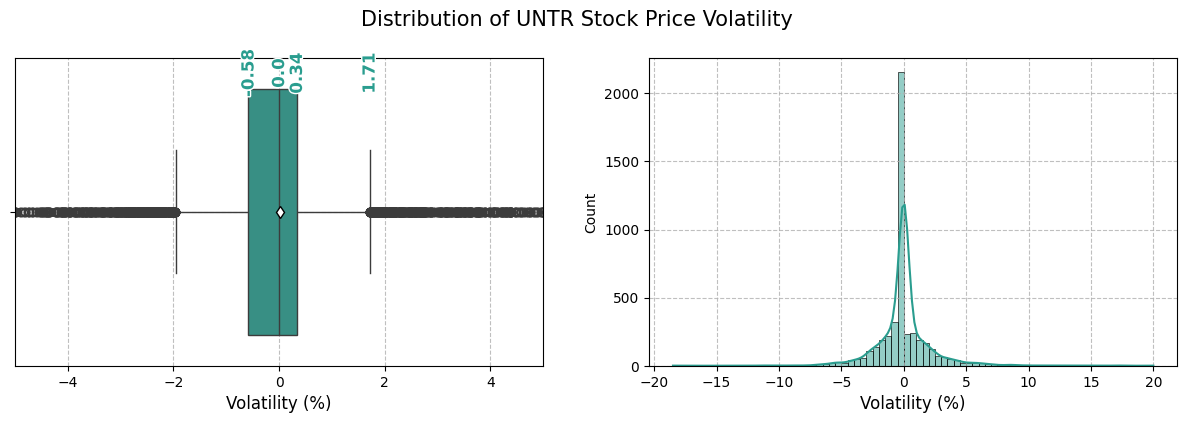

In [55]:
stock_volatility = eda_df.loc[:,["Close", "Open"]]
stock_volatility["value_change_percentage"] = ((stock_volatility["Close"]/stock_volatility["Open"]) - 1)*100

mean_volatility = stock_volatility["value_change_percentage"].values.mean()
std_volatility = stock_volatility["value_change_percentage"].values.std()

print(f"Rata-rata volatilitas per hari   : {mean_volatility:.2f}%")
print(f"St. Deviasi volatilitas per hari : {std_volatility:.2f}%")

# range volatility (95% confidence interval)
volatility_range = st.norm(mean_volatility, std_volatility).interval(0.95)
print(f"Tingkat volatilitas harian saham UNTR berada pada rentang (95% CI) : {volatility_range}")

# histogram chart
box_hist_plot(stock_volatility, column="value_change_percentage", size=(15,4), width=0.5, rot=90, l_xlim=(-5,5),
              title="Distribution of UNTR Stock Price Volatility", y_title=1, xlabel="Volatility (%)")

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Distribusi volatilitas harian memiliki bentuk yang simetris dengan rata-rata pada nilai 0.01%. Nilai rata-rata sebesar 0% disertai distribusi yang simetris mengindikasikan volatilitas harian saham UNTR bersifat acak. Hal ini berarti harga saham setiap harinya relatif bersifat independen.
* Secara statistik, volatilitas harian harga saham UNTR berkisar pada -4% hingga 4%. Peluang volatilitas ini yang akan dimanfaatkan oleh *trader* untuk memperoleh *return* harian.
</div>

## <a id='toc5_3_'></a>[3) Bagaimana Korelasi Harga Masa Lalu Terhadap Harga Saham saat ini?](#toc0_)

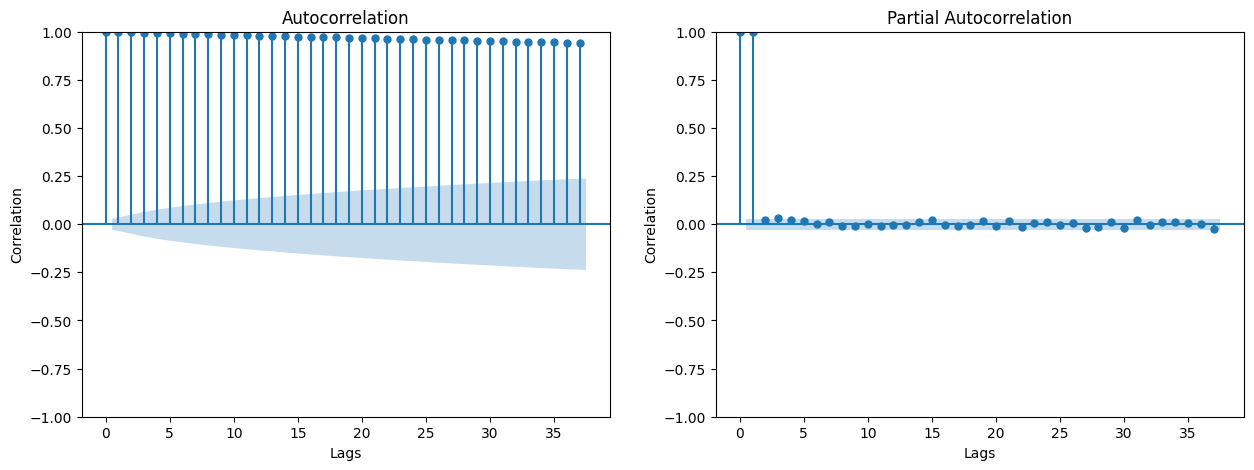

In [65]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
plot_acf(eda_df['Close'], ax=ax[0])
plot_pacf(eda_df['Close'], ax=ax[1])
ax[0].set_xlabel("Lags")
ax[1].set_xlabel("Lags")
ax[0].set_ylabel("Correlation")
ax[1].set_ylabel("Correlation")
plt.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Berdasarkan plot PACF, terlihat bahwa harga saham hari ini secara signifikan hanya bergantung pada harga kemarin.
* Kebergantungan harga hari ini dengan beberapa hari sebelumnya pada plot ACF disebabkan oleh ketergantungan parsial secara berkesinambungan.
* Bentuk distribusi plot ACF yang  menurun secara kontinu serta distribusi plot PACF yang menurun secara signifikan, mengindikasikan model forecasting untuk harga saham membutuhkan model bertipe *autoregresive*.
</div>

# <a id='toc6_'></a>[**F. Membangun Model *Machine-learning***](#toc0_)

## <a id='toc6_1_'></a>[1) *Features Engineering*](#toc0_)

Berikut di bawah ini akan dilakukan pemisahan antara *features* dan *targets* serta melakukan pembagian data menjadi 3 bagian, yakni *training set*, *validation set* dan *testing set* dengan komposisi 70:15:15.

In [12]:
# memisahkan targets dan features
targets_cols = ['High', 'Low',
                'High(t+1)', 'Low(t+1)', 
                'High(t+2)', 'Low(t+2)',
                'High(t+3)', 'Low(t+3)', 
                'High(t+4)', 'Low(t+4)'
                ]

features_cols = new_df.columns.drop(targets_cols).to_list()

x = new_df[features_cols]
y = new_df[targets_cols]

# melakukan data split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, shuffle=False)

print(f"Training set size (x/y)  : {x_train.shape}/{y_train.shape}")
print(f"Validation set size (x/y): {x_val.shape}/{y_val.shape}")
print(f"Testing set size (x/y)   : {x_test.shape}/{y_test.shape}")


Training set size (x/y)  : (3271, 18)/(3271, 10)
Validation set size (x/y): (701, 18)/(701, 10)
Testing set size (x/y)   : (702, 18)/(702, 10)


Berikut di bawah ini akan dilakukan *scaling* data numerik pada fitur.

In [13]:
# melakukan scaling fitur
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


Untuk menyesuaikan dengan format input dan output model, maka kita perlu melakukan transformasi dimensi data fitur dan target.

In [14]:
# melakukan transformasi dimensi matriks

features_unique = ['Open', 'High', 'Low', 'Close', 'MA20', 'breakout_MA20']
x_train = x_train.reshape((-1, x_train.shape[1]//len(features_unique), len(features_unique)))
x_val = x_val.reshape((-1, x_val.shape[1]//len(features_unique), len(features_unique)))
x_test = x_test.reshape((-1, x_test.shape[1]//len(features_unique), len(features_unique)))

y_train = y_train.values.reshape((-1, y_train.shape[1]))
y_val = y_val.values.reshape((-1, y_val.shape[1]))
y_test = y_test.values.reshape((-1, y_test.shape[1]))

print(f"Training set size (x/y)  : {x_train.shape}/{y_train.shape}")
print(f"Validation set size (x/y): {x_val.shape}/{y_val.shape}")
print(f"Testing set size (x/y)   : {x_test.shape}/{y_test.shape}")

Training set size (x/y)  : (3271, 3, 6)/(3271, 10)
Validation set size (x/y): (701, 3, 6)/(701, 10)
Testing set size (x/y)   : (702, 3, 6)/(702, 10)


Berikut di bawah ini, dataset akan dibuat menjadi objek *Dataset* agar dapat dilakukan pengambilan *batch* dengan ukuran tertentu.

In [15]:
# membuat dataset menjadi objek Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float)
        self.y = torch.tensor(y, dtype=torch.float)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
   
train_dataset = TimeSeriesDataset(x_train, y_train)
val_dataset = TimeSeriesDataset(x_val, y_val)
test_dataset = TimeSeriesDataset(x_test, y_test)

In [16]:
# mengatur pengambilan batch
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"{batch_size} data dari batch pertama untuk x_train dan y_train: "
      f"{list(train_loader)[0][0].shape, list(train_loader)[0][1].shape}")


32 data dari batch pertama untuk x_train dan y_train: (torch.Size([32, 3, 6]), torch.Size([32, 10]))


## <a id='toc6_2_'></a>[2) Membangun Model](#toc0_)

Pada bagian di bawah ini, kita akan membuat arsitektur model LSTM untuk memprediksi harga saham. Berikut merupakan ilustrasi diagram untuk arsitektur model LSTM yang akan dibangun.

<img src="assets/fig1.jpg" width="1200px">
<img src="assets/fig2.jpg" width="1200px">

In [17]:
# membuat arsitektur model

class LSTMmodel(nn.Module):
    def __init__(self, n_input, num_stacked_layers, hidden_size, n_output, hidd_layers:tuple[int]=None, dtype=torch.float):
        super().__init__()
        self.num_stacked_layers = num_stacked_layers
        self.hidden_size = hidden_size
        
        # membuat LSTM cell
        self.lstm = nn.LSTM(input_size=n_input,
                            hidden_size=hidden_size, 
                            num_layers=num_stacked_layers, 
                            dtype=dtype,
                            batch_first=True)
        
        # membuat fully connected layers
        if hidd_layers:
            # input layer
            self.fc = torch.nn.ModuleList([torch.nn.Linear(hidden_size, hidd_layers[0], dtype=dtype), torch.nn.Tanh()])
            
            # hidden layers
            for i in range(1, len(hidd_layers)):
                self.fc.extend([torch.nn.Linear(hidd_layers[i-1], hidd_layers[i], dtype=dtype), torch.nn.Tanh()])
            
            # output layer
            self.fc.append(torch.nn.Linear(hidd_layers[-1], n_output, dtype=dtype))
            
        else:
            self.fc = torch.nn.ModuleList([torch.nn.Linear(hidden_size, n_output, dtype=dtype)])
    
    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        out, (h1, c1) = self.lstm(x, (h0, c0))
        x = out[:,-1,:]
        
        for layer in self.fc:
            x = layer(x)
        return x

## <a id='toc6_3_'></a>[3) Melatih Model](#toc0_)

Berikut di bawah ini merupakan sejumlah *function* yang akan berguna untuk proses pelatihan model.

In [18]:
# function untuk hitung Mean Absolute Percentage Error
def mape_score(y_predict, y_true):
    score = torch.abs(1 - y_predict/y_true).mean()*100
    return score
    
# function untuk training 1 epoch
def train_model_one_epoch(model, train_loader, loss_func, lr):
    # initialize optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    accum_loss = []
    accum_mape = []
    
    for batch_index, batch in enumerate(train_loader):
        # ambil batch data
        x_batch, y_batch = batch[0], batch[1]
        
        # predict training set
        pred = model(x_batch)
        mape = mape_score(pred, y_batch)
        loss = loss_func(pred, y_batch)
        accum_mape.append(mape.item())
        accum_loss.append(loss.item())
        
        # into training mode
        model.train()
        # back propagation
        loss.backward() 
        # update parameters  
        optimizer.step()
        # reset gradient
        optimizer.zero_grad()
    
    mean_loss = np.mean(accum_loss)
    mean_mape = np.mean(accum_mape)
    
    # log
    print(f"{{'avg. loss (training)': {mean_loss:.4f}, 'avg. mape (training)': {mean_mape:.2f}%}}")
    
    return mean_loss, mean_mape

# function untuk validasi 1 epoch
def validate_model_one_epoch(model, val_loader, loss_func):
    
    accum_loss = []
    accum_mape = []
    
    model.eval()
    for batch_index, batch in enumerate(val_loader):
        # ambil batch data
        x_batch, y_batch = batch[0], batch[1]
        
        with torch.inference_mode():
            # predict validation set
            pred = model(x_batch)
            mape = mape_score(pred, y_batch)
            loss = loss_func(pred, y_batch)
            accum_mape.append(mape.item())
            accum_loss.append(loss.item())
            
    mean_loss = np.mean(accum_loss)
    mean_mape = np.mean(accum_mape)
    
    # log
    print(f"{{'avg. loss (validation)': {mean_loss:.4f}, 'avg. mape (validation)': {mean_mape:.2f}%}}")   
    
    return mean_loss, mean_mape

Dari sejumlah uji coba konfigurasi *features* dan model LSTM, maka diperoleh konfigurasi terbaik sebagai berikut. 

In [19]:
# random seed
torch.manual_seed(101010)


# melatih model
lstm = LSTMmodel(n_input=6, 
                 num_stacked_layers=1,
                 hidden_size=65,
                 hidd_layers=(),
                 n_output=2*5)

learning_rate = 0.001
num_epochs = 3000
loss_function = nn.MSELoss()

loss_result = []
mape_result = []

for epoch in range(num_epochs):
    print(f"\n{f' Epoch: {epoch+1} ':=^100}")
    val_loss, val_mape = validate_model_one_epoch(model=lstm, val_loader=val_loader, loss_func=loss_function)
    train_loss, train_mape = train_model_one_epoch(model=lstm, train_loader=train_loader, 
                                                  loss_func=loss_function, lr=learning_rate)
    
    loss_result.append({'training':train_loss, 'validation':val_loss})
    mape_result.append({'training':train_mape, 'validation':val_mape})

# informasi model   
lstm, f"lr:{learning_rate}"


============================================= Epoch: 1 =============================================
{'avg. loss (validation)': 661537190.5455, 'avg. mape (validation)': 100.00%}
{'avg. loss (training)': 216608356.3495, 'avg. mape (training)': 65.71%}

============================================= Epoch: 2 =============================================
{'avg. loss (validation)': 317132113.4545, 'avg. mape (validation)': 64.71%}
{'avg. loss (training)': 88088135.8641, 'avg. mape (training)': 34.20%}

============================================= Epoch: 3 =============================================
{'avg. loss (validation)': 155636586.7727, 'avg. mape (validation)': 40.79%}
{'avg. loss (training)': 40622631.6990, 'avg. mape (training)': 21.46%}

============================================= Epoch: 4 =============================================
{'avg. loss (validation)': 87448275.9830, 'avg. mape (validation)': 27.81%}
{'avg. loss (training)': 23884102.7767, 'avg. mape (training)': 17.

{'avg. loss (training)': 1495729.5904, 'avg. mape (training)': 8.39%}

============================================ Epoch: 129 ============================================
{'avg. loss (validation)': 2225492.0043, 'avg. mape (validation)': 4.60%}
{'avg. loss (training)': 1652597.6887, 'avg. mape (training)': 9.27%}

============================================ Epoch: 130 ============================================
{'avg. loss (validation)': 2598554.8111, 'avg. mape (validation)': 4.94%}
{'avg. loss (training)': 1771497.4873, 'avg. mape (training)': 10.37%}

============================================ Epoch: 131 ============================================
{'avg. loss (validation)': 2437906.8239, 'avg. mape (validation)': 4.90%}
{'avg. loss (training)': 1796701.0073, 'avg. mape (training)': 10.49%}

============================================ Epoch: 132 ============================================
{'avg. loss (validation)': 2036968.1903, 'avg. mape (validation)': 4.36%}
{'avg. loss (t

(LSTMmodel(
   (lstm): LSTM(6, 65, batch_first=True)
   (fc): ModuleList(
     (0): Linear(in_features=65, out_features=10, bias=True)
   )
 ),
 'lr:0.001')

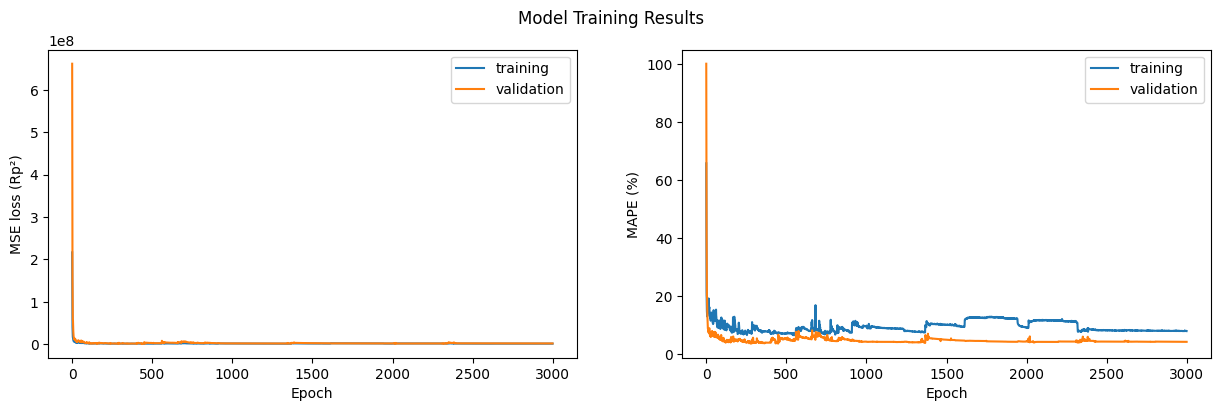

In [20]:
# graph the loss results in the epoch function
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
pd.DataFrame(loss_result).plot(ax=ax[0])
pd.DataFrame(mape_result).plot(ax=ax[1])
ax[0].set_ylabel("MSE loss (Rp\u00b2)")
ax[1].set_ylabel("MAPE (%)")
ax[0].set_xlabel("Epoch")
ax[1].set_xlabel("Epoch")
plt.suptitle(f"Model Training Results")
plt.show()

## <a id='toc6_4_'></a>[4) *Model Testing*](#toc0_)

Pada bagian sebelumnya, model telah dilatih dan dicari konfigurasi terbaiknya. Berikutnya, kita akan melakukan pengujian model pada *testing dataset* dan melakukan perhitungan MAPE.

In [31]:
with torch.inference_mode():
    dtype = torch.float
    x_tensor = torch.tensor(x_test, dtype=dtype)
    y_tensor = torch.tensor(y_test, dtype=dtype)
    pred = lstm(x_tensor)
    mape = mape_score(pred, y_tensor)
    loss = loss_function(pred, y_tensor)
        
print(f"MAPE score : {mape:.2f}%")
print(f"MSE loss   : {loss}")

MAPE score : 4.24%
MSE loss   : 2020913.25


Hasil evaluasi model memperoleh skor MAPE sebesar 4.24% dan sangat dekat dengan hasil uji pada *validation set*. Hal ini menunjukkan bahwa model cukup stabil dalam melakukan prediksi pada data yang belum dilihat sebelumnya.

Berikutnya kita akan menyimpan model yang telah di-training tersebut ke dalam direktori.

In [29]:
# save model
path = "model/untr_stock_price_predictor.pt"

model_scripted = torch.jit.script(lstm)
model_scripted.save(path)

Kita juga perlu untuk menyimpan *scaler* untuk kebutuhan *feature scaling*.

In [30]:
# menyimpan scaler
joblib.dump(scaler, 'assets/scaler.pkl', compress=9)

['assets/scaler.pkl']

# <a id='toc7_'></a>[**G. Kesimpulan**](#toc0_)

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">Key Points</div>
<div style="margin-left:2%; width:95%; text-align:justify">

Berikut merupakan sejumlah temuan penting yang diperoleh pada tahap **Analisa Data Eksploratif**:
* Saham UNTR memiliki tren positif dalam jangka panjang, tetapi memiliki sifat siklikal dengan periode sekitar 5 tahun. Harga tertinggi pada masing-masing periode terjadi pada tahun 2008, 2012, 2018, dan 2022.
* Saham UNTR memiliki rentang volatilitas harian sebesar -4% hingga +4% (95% CI), dengan distribusi volatilitas yang simetris.
* Berdasarkan analisasi korelasi parsial, harga saham UNTR hari ini hanya bergantung pada harga kemarin (t-1). Adapun harga kemarin lusa dan seterusnya tidak berkorelasi secara signifikan terhadap harga hari ini.

</div>

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">Conclusions</div>
<div style="margin-left:2%; width:95%; text-align:justify">

Berikut di bawah ini merupakan kesimpulan dari tujuan proyek ini yang berkaitan dengan pembangunan model *forecasting* harga saham UNTR:
* Konfigurasi fitur terbaik diperoleh dengan memadukan fitur *lag* untuk 3 hari sebelumnya dengan fitur *moving average* dan *breakout*. Adapun fitur *moving average* yang digunakan yaitu MA20 yang disertai dengan *breakout*-MA20.
* Konfigurasi model LSTM terbaik yang digunakan yaitu model LSTM dengan jumlah `hidden_size` sebesar 65 output dengan 1-*stacked layer*. Adapun konfigurasi *fully-connected layers* yang digunakan yakni 65 neuron input disertai dengan 10 neuron output.
* Model yang dihasilkan pada proyek ini memiliki kemampuan prediksi yang stabil pada *unseen data* dikarenakan memiliki skor MAPE yang relatif sama antara hasil prediksi *validation set* dan *testing set*. Adapun dari hasil evaluasi, skor MAPE untuk model tersebut yaitu sebesar 4.24%.

</div>